# Projeto Viabilidade

Este projeto é um trabalho de alunos do Mackenzie EAD (Curso de Ciência de dados), com o intuito de realizar o processamento de dados abertos de CNPJ e de dados macroeconômicos, com a intenção de criar insights sobre o ambiente econômico no país.



## Entendimento do Negócio

<b>Empresa</b>

Berkshire Hathaway

<b> Segmento de Atuação</b>

A empresa Berkshire Hathaway é uma das maiores holdings do mundo. Ela tem participação em diversos setores, baseando seu modelo de negócio na aquisição de empresas bem estruturadas e na valorização de investimentos de longo prazo. 

<b> Market Share</b>

No momento, a atuação da empresa no Brasil é bem limitada, o que abre espaço para identificação de oportunidades estratégicas de investimentos no país.


### Problema fundamental

A empresa, para a manutenção de níveis elevados de rentabilidade de longo prazo, enfrenta um dilema de custo-benefício: ela precisa reduzir custos operacionais (de desvendamento de empresas e setores de interesse estratégico) ao mesmo tempo que precisa identificar oportunidades para crescimento da carteira. 

O custo de contratação de profissionais altamente especializados em cada setor e região geográfica pode afetar o nível de rentabilidade geral da empresa, inviabilizando um estudo amplo e aprofundado de toda a economia brasileira. 

Diante disso, um trabalho possível de ser realizado se pauta na identificação de setores que ofereçam as melhores oportunidades de investimento para a holding, a fim de que as despesas com profissionais seja otimizada. 


### Limitação do Problema Fundamental

É essencial entender que a economia é uma ciência complexa e, portanto, mensurar cada atividade pode gerar um custo elevado para o grupo de ciência de dados.

Assim, algumas heurísticas foram adotadas para reduzir o escopo do projeto, quais sejam:

1. Em virtude da Reforma Tributária, compreende-se que o país poderá caminhar para um menor direcionamento a serviços e maior à industrialização, salvo exceções (como serviços de Data Center e outros com envolvimento de TI);
2. A preocupação global com economias sustentáveis pode oportunizar ao Brasil a manutenção de polo industrial, em proximidade com fontes de energias renováveis.




Além disso, é importante que se reduza o escopo para abarcar dados após o período da pandemia. Isso se dá em vitude de o momento histórico servir de ruptura das tendências anteriores, podendo prejudicar as análises posteriores.


Diante do relatado, o escopo do problema foi reduzido a:


<center> <i> <b> Quais setores industriais possuem um potencial de crescimento nos próximos anos? </b> </i> </center>



## Entendimento dos Dados 


Diante do desafio proposto, o grupo de cientista de dados identificou um conjunto de base de dados abertos, gerados por associações de interesse público e/ou órgãos públicos, auxiliando a redução de custos para um primeiro trabalho de análise de dados.


Os dados foram obtidos através da biblioteca "ipeadatapy", que se propõe a trazer diversos dados abertos (de diversas origens) através de uma única API.



In [87]:
import ipeadatapy as ip
import pandas as pd

In [88]:
indicadores = [
    'PIM2020S321N','PIM2020S326N','PIMALIMENTN','PIMBEBIDAN','PIMBORRAPLASN','PIMCALCOURON','PIMCELUPAPELN','PIMEXTMINN','PIMFUMON',
'PIMINDTRANSFN','PIMMADEIRAN','PIMMAQAPAELEN','PIMMAQEQUIPN','PIMMETALURGIAN','PIMMINNAOMETN','PIMMOBILIARION','PIMOUTETRANSPN',
'PIMOUTPQUIMICON','PIMPRODMETEXCMEN','PIMREFPETALCN','PIMTEXTILN','PIMVEICULOSAUTN','PIMVESTUARIOACEN','CONSUMOIND',
'CNC12_ICAEC12','CNC12_ICEC12','CNC12_ICF12','FCESP12_IIC12'
]


In [89]:
df = ip.metadata()

df = df[df['CODE'].isin(indicadores)]
df.to_excel('ListaDadosAbertos.xlsx')

### Metadados dos arquivos

Tipo de arquivos: 

- Dados abertos de responsabilidade dos seguintes órgãos:

In [90]:
print('Origem/Responsável dos dados abertos:\n')

n = 0
for origem in df['SOURCE'].unique():
    n += 1
    print(f'Órgão/Entidade nº {n}: ', origem)


Origem/Responsável dos dados abertos:

Órgão/Entidade nº 1:  Instituto  Brasileiro de Geografia e Estatística
Órgão/Entidade nº 2:  Ministério de Minas e Energia, Balanço Energético Nacional (MME)
Órgão/Entidade nº 3:  Confederação Nacional do Comércio de Bens, Serviços e Turismo
Órgão/Entidade nº 4:  Federação do Comércio do Estado de São Paulo, Pesquisa Conjuntural do Comércio Varejista  da Região Metropolitana de São Paulo (Fecomercio SP)


Todos os dados são abertos e, portanto, <b>não há dados sensíveis</b>, viabilizando o seu uso no projeto atual. 


As informações adicionais dos dados podem ser vislumbradas abaixo:


In [91]:
print("Maiores informações sobre os dados: \n")

for idx, row in df.iterrows():
    print('========================================================================')
    print(f'{row.NAME} - {row.CODE}')
    print('-------------------------------------------------------------------------')
    print(f'Descrição: {row.COMMENT}')
    print(f'Origem dos dados: {row.SOURCE} - {row['SOURCE URL']}')
    print(f'Frequência dos dados: {row.FREQUENCY}\n')

    

Maiores informações sobre os dados: 

Produção industrial - produtos farmoquímicos e farmacêuticos - quantum - índice (média 2022 = 100) - PIM2020S321N
-------------------------------------------------------------------------
Descrição: A produção industrial da fabricação de produtos farmoquímicos e farmacêuticos considera a fabricação de produtos farmoquímicos, a fabricação de medicamentos e de outros produtos farmacêuticos, tais como: curativos impregnados com qualquer substância, preparações anti-sépticas, etc. Esta classificação não compreende a fabricação de alimentos dietéticos, alimentos enriquecidos, complementos alimentares e semelhantes. A base foi fixada como a média das observações no ano de 2022. Notas: A Pesquisa Industrial Mensal Produção Física têm por objetivo acompanhar a evolução do produto real da indústria no curto prazo, sendo necessário o levantamento de informações de volume físico de produtos selecionados e representativos de diferentes atividades industriais. 

Como se observa acima, há inúmeros indicadores envolvidos com os seguintes tópicos:

1. Indicadores de Produção Industrial por segmento de produto
2. Indicador de uso de energia elétrica pela Indústria
3. Indicadores de confiança do Empresário Varejista 
4. Indicadores de confiança do Consumidor


Os primeiros indicarão o crescimento setorial da produção industrial. Serão importantes para avaliar se há algum indicativo de que um determinado segmento está atraindo o empresariado (e possivelmente indicando algum lucro oculto pelo qual seja interessante analisar mais detalhadamente).
Já o indicador de uso de energia elétrica pode servir para modelar e compreender como o consumo de energia pode afetar o setor industrial.

Por fim, os indicadores de confiança dos varejistas e consumidores, numa primeira análise, podem indicar se há espaço para investimentos na produção ou se a tendência da demanda é reduzir. 


#### Temporalidade

Já de início, percebe-se que uma das fontes é anualizada (consumo de energia elétrica), motivo pelo qual terá que ser tratada na Preparação de Dados.


#### Aprofundando nos dados

Cada série de dados de produção possui as seguintes colunas:

In [92]:
exemplo = ip.timeseries('PIM2020S321N')
exemplo.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 591 entries, 2002-01-01 to 2025-01-01
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CODE       591 non-null    object 
 1   RAW DATE   591 non-null    object 
 2   TERCODIGO  591 non-null    object 
 3   YEAR       591 non-null    int32  
 4   NIVNOME    591 non-null    object 
 5   VALUE (-)  591 non-null    float64
dtypes: float64(1), int32(1), object(4)
memory usage: 30.0+ KB


Nesse caso, a explicação das colunas, extraídas do site da API <a href='https://www.luanborelli.net/ipeadatapy/docs/usage/quickstart/metadata.html'>IpeaDataPY</a>:

1. CODE: Código da série 

2. RAW DATE: data de extração dos dados 

3. TERCODIGO: Código do território (os dados de produção são setoriais, divididos por Estados)

4. YEAR: Ano de referência

5. NIVNOME: Nível da segmentação. No caso dos dados de produção, são ESTADUAIS

6. VALUE: Valor do indicador


O código TERCODIGO pode ser extraído pelo comando abaixo:

In [93]:
estados = ip.territories()
estados.head()

,NAME,ID,LEVEL,AREA,CAPITAL
0,(não definido),,,NaN,None
1,Brasil,0,Brasil,8531507.6,False
2,Região Norte,1,Regiões,3869637.9,False
3,Rondônia,11,Estados,238512.8,False
4,Alta Floresta D'Oeste,1100015,Municípios,7111.8,False


Esse código de Estados será utilizado mais à frente para permitir uma exploração mais adequada dos dados.

Já o de consumo de energia possui a seguinte estrutura, semelhante ao de produção.

In [94]:
exemplo = ip.timeseries('CONSUMOIND')
exemplo.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2006 entries, 1961-01-01 to 2024-01-01
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CODE         2006 non-null   object 
 1   RAW DATE     2006 non-null   object 
 2   TERCODIGO    2006 non-null   object 
 3   YEAR         2006 non-null   int32  
 4   NIVNOME      2006 non-null   object 
 5   VALUE (MWh)  2006 non-null   float64
dtypes: float64(1), int32(1), object(4)
memory usage: 101.9+ KB


Por fim, os indicadores de confiança, que não são setoriais, não possuem as colunas NIVNOME e TERCODIGO

In [95]:
exemplo = ip.timeseries('CNC12_ICAEC12')
exemplo.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 146 entries, 2013-01-01 to 2025-02-01
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CODE            146 non-null    object 
 1   RAW DATE        146 non-null    object 
 2   DAY             146 non-null    int32  
 3   MONTH           146 non-null    int32  
 4   YEAR            146 non-null    int32  
 5   VALUE (Indice)  146 non-null    float64
dtypes: float64(1), int32(3), object(2)
memory usage: 6.3+ KB


##### Indicadores de Produção

Para a extração dos dados, percebeu-se ser necessário apenas os seguintes dados:

- DATE
- CODE
- TERCODIGO
- NIVNOME
- VALUE (-)

In [96]:
indicadores_producao = [
    'PIM2020S321N','PIM2020S326N','PIMALIMENTN','PIMBEBIDAN','PIMBORRAPLASN','PIMCALCOURON','PIMCELUPAPELN','PIMEXTMINN','PIMFUMON',
'PIMINDTRANSFN','PIMMADEIRAN','PIMMAQAPAELEN','PIMMAQEQUIPN','PIMMETALURGIAN','PIMMINNAOMETN','PIMMOBILIARION','PIMOUTETRANSPN',
'PIMOUTPQUIMICON','PIMPRODMETEXCMEN','PIMREFPETALCN','PIMTEXTILN','PIMVEICULOSAUTN','PIMVESTUARIOACEN'
]

dados_producao = pd.DataFrame()

for indicador in indicadores_producao:
    temp = ip.timeseries(indicador, yearGreaterThan = 2021)[['CODE', 'TERCODIGO', 'NIVNOME', 'VALUE (-)']]
    temp.rename(columns={'VALUE (-)': 'VALOR'}, inplace=True)
    dados_producao = pd.concat([dados_producao, temp])

dados_producao

,CODE,TERCODIGO,NIVNOME,VALOR
DATE,,,,
2022-01-01,PIM2020S321N,33,Estados,37.57661
2022-01-01,PIM2020S321N,35,Estados,61.12097
2022-01-01,PIM2020S321N,52,Estados,75.93972
2022-02-01,PIM2020S321N,33,Estados,80.85588
2022-02-01,PIM2020S321N,52,Estados,85.93959
...,...,...,...,...
2025-01-01,PIMVESTUARIOACEN,42,Estados,73.60355
2025-01-01,PIMVESTUARIOACEN,23,Estados,75.56116
2025-01-01,PIMVESTUARIOACEN,52,Estados,77.85341


##### Indicadores de Consumo de Energia Elétrica

Para a extração dos dados, percebeu-se ser necessário apenas os seguintes dados:

- DATE
- CODE
- TERCODIGO
- NIVNOME
- VALUE (MWh)

In [97]:
dados_energia = ip.timeseries('CONSUMOIND', yearGreaterThan=2021)[['CODE', 'TERCODIGO', 'NIVNOME', 'VALUE (MWh)']]
dados_energia.rename(columns={'VALUE (MWh)': 'VALOR'}, inplace=True)
dados_energia

,CODE,TERCODIGO,NIVNOME,VALOR
DATE,,,,
2022-01-01,CONSUMOIND,14,Estados,2.466700e+04
2022-01-01,CONSUMOIND,12,Estados,4.790571e+04
2022-01-01,CONSUMOIND,16,Estados,1.034202e+05
2022-01-01,CONSUMOIND,22,Estados,2.259830e+05
2022-01-01,CONSUMOIND,17,Estados,4.213908e+05
...,...,...,...,...
2024-01-01,CONSUMOIND,42,Estados,1.240143e+07
2024-01-01,CONSUMOIND,15,Estados,1.424582e+07
2024-01-01,CONSUMOIND,41,Estados,1.517981e+07


##### Indicadores de Confiança

Para a extração dos dados, percebeu-se ser necessário apenas os seguintes dados:

- DATE
- CODE
- VALUE (Indice)

In [98]:
indicadores_consumo = ['CNC12_ICAEC12','CNC12_ICEC12','CNC12_ICF12','FCESP12_IIC12']
dados_consumo = pd.DataFrame()

for indicador in indicadores_consumo:
    temp = ip.timeseries(indicador, yearGreaterThan = 2021)
    temp.rename(columns = {'VALUE (Indice)': 'VALOR', 'VALUE (-)': 'VALOR'}, inplace=True)
    dados_consumo = pd.concat([dados_consumo, temp[['CODE', 'VALOR']]])

dados_consumo  

,CODE,VALOR
DATE,,
2022-01-01,CNC12_ICAEC12,100.083487
2022-02-01,CNC12_ICAEC12,100.442384
2022-03-01,CNC12_ICAEC12,98.267597
2022-04-01,CNC12_ICAEC12,98.026514
2022-05-01,CNC12_ICAEC12,102.191804
...,...,...
2024-10-01,FCESP12_IIC12,120.970000
2024-11-01,FCESP12_IIC12,123.930000
2024-12-01,FCESP12_IIC12,125.620000


### Preparação Prévia


Antes de iniciar a Análise Exploratória de Dados, é interessante realizar uma preparação prévia dos dados, a fim de que comportem informações úteis e de forma adequada. 


##### dados_producao

Analisando os dados de produção, podemos perceber abaixo que o Código não indica fielmente a que indicado se refere. Além disso, o TERCODIGO não permite insights profundos por não ser reconhecido facilmente, conforme abaixo:

In [99]:
dados_producao.reset_index(inplace=True)
dados_producao.head()


,DATE,CODE,TERCODIGO,NIVNOME,VALOR
0,2022-01-01,PIM2020S321N,33,Estados,37.57661
1,2022-01-01,PIM2020S321N,35,Estados,61.12097
2,2022-01-01,PIM2020S321N,52,Estados,75.93972
3,2022-02-01,PIM2020S321N,33,Estados,80.85588
4,2022-02-01,PIM2020S321N,52,Estados,85.93959


Duas alterações são propostas:

1. Alterar o nome do código 
2. Inserir nome do Estado


In [100]:
nomes_codigos = df[df['CODE'].isin(dados_producao.CODE)][['CODE', 'NAME']]
nomes_codigos['NAME'] = [nome.split('-')[1] for nome in nomes_codigos['NAME']]
nomes_codigos.head()

,CODE,NAME
56,PIM2020S321N,produtos farmoquímicos e farmacêuticos
57,PIM2020S326N,"equipamentos de informática, produtos eletrôn..."
60,PIMALIMENTN,produtos alimentícios
61,PIMBEBIDAN,bebidas
62,PIMBORRAPLASN,produtos de borracha e material plástico


Inserindo nome:

In [101]:
dados_producao_corrigido = dados_producao.merge(nomes_codigos, on='CODE', how='left', validate='many_to_one')
dados_producao_corrigido

,DATE,CODE,TERCODIGO,NIVNOME,VALOR,NAME
0,2022-01-01,PIM2020S321N,33,Estados,37.57661,produtos farmoquímicos e farmacêuticos
1,2022-01-01,PIM2020S321N,35,Estados,61.12097,produtos farmoquímicos e farmacêuticos
2,2022-01-01,PIM2020S321N,52,Estados,75.93972,produtos farmoquímicos e farmacêuticos
3,2022-02-01,PIM2020S321N,33,Estados,80.85588,produtos farmoquímicos e farmacêuticos
4,2022-02-01,PIM2020S321N,52,Estados,85.93959,produtos farmoquímicos e farmacêuticos
...,...,...,...,...,...,...
7136,2025-01-01,PIMVESTUARIOACEN,42,Estados,73.60355,artigos do vestuário e acessórios
7137,2025-01-01,PIMVESTUARIOACEN,23,Estados,75.56116,artigos do vestuário e acessórios
7138,2025-01-01,PIMVESTUARIOACEN,52,Estados,77.85341,artigos do vestuário e acessórios
7139,2025-01-01,PIMVESTUARIOACEN,35,Estados,78.74954,artigos do vestuário e acessórios


Inserindo Estado:

In [102]:
estados_reduzido = estados[['NAME', 'ID']]
estados_reduzido.columns = ['NOME_ESTADO', 'TERCODIGO']

In [103]:
estados_reduzido

,NOME_ESTADO,TERCODIGO
0,(não definido),
1,Brasil,0
2,Região Norte,1
3,Rondônia,11
4,Alta Floresta D'Oeste,1100015
...,...,...
19344,Brasília,530010
19345,Brasília,530010
19346,Brasília,530010
19347,Brasília,5300108


In [104]:
estados_reduzido = estados[['NAME', 'ID']]
estados_reduzido.columns = ['NOME_ESTADO', 'TERCODIGO']
estados_reduzido.drop_duplicates(subset='TERCODIGO', inplace=True)
dados_producao_corrigido = dados_producao_corrigido.merge(estados_reduzido, on='TERCODIGO', how='left', validate='many_to_one')
dados_producao_corrigido.head()

/tmp/ipykernel_177538/2957514607.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,DATE,CODE,TERCODIGO,NIVNOME,VALOR,NAME,NOME_ESTADO
0,2022-01-01,PIM2020S321N,33,Estados,37.57661,produtos farmoquímicos e farmacêuticos,Rio de Janeiro
1,2022-01-01,PIM2020S321N,35,Estados,61.12097,produtos farmoquímicos e farmacêuticos,São Paulo
2,2022-01-01,PIM2020S321N,52,Estados,75.93972,produtos farmoquímicos e farmacêuticos,Goiás
3,2022-02-01,PIM2020S321N,33,Estados,80.85588,produtos farmoquímicos e farmacêuticos,Rio de Janeiro
4,2022-02-01,PIM2020S321N,52,Estados,85.93959,produtos farmoquímicos e farmacêuticos,Goiás


In [105]:
dados_producao_corrigido = dados_producao_corrigido[['DATE', 'NOME_ESTADO', 'NAME', 'VALOR']]
dados_producao_corrigido

,DATE,NOME_ESTADO,NAME,VALOR
0,2022-01-01,Rio de Janeiro,produtos farmoquímicos e farmacêuticos,37.57661
1,2022-01-01,São Paulo,produtos farmoquímicos e farmacêuticos,61.12097
2,2022-01-01,Goiás,produtos farmoquímicos e farmacêuticos,75.93972
3,2022-02-01,Rio de Janeiro,produtos farmoquímicos e farmacêuticos,80.85588
4,2022-02-01,Goiás,produtos farmoquímicos e farmacêuticos,85.93959
...,...,...,...,...
7136,2025-01-01,Santa Catarina,artigos do vestuário e acessórios,73.60355
7137,2025-01-01,Ceará,artigos do vestuário e acessórios,75.56116
7138,2025-01-01,Goiás,artigos do vestuário e acessórios,77.85341
7139,2025-01-01,São Paulo,artigos do vestuário e acessórios,78.74954


##### dados_energia

Mesma coisa dos dados de produção

In [106]:
dados_energia.reset_index(inplace=True)
dados_energia.head()


,DATE,CODE,TERCODIGO,NIVNOME,VALOR
0,2022-01-01,CONSUMOIND,14,Estados,24667.00
1,2022-01-01,CONSUMOIND,12,Estados,47905.71
2,2022-01-01,CONSUMOIND,16,Estados,103420.23
3,2022-01-01,CONSUMOIND,22,Estados,225983.00
4,2022-01-01,CONSUMOIND,17,Estados,421390.85


In [107]:
dados_energia_corrigido = dados_energia.merge(estados_reduzido, on='TERCODIGO', how='left', validate='many_to_one')
dados_energia_corrigido['CODE'] = 'Consumo de Energia Elétrica'
dados_energia_corrigido = dados_energia_corrigido[['DATE', 'NOME_ESTADO', 'CODE', 'VALOR']]
dados_energia_corrigido.columns = ['DATE', 'NOME_ESTADO', 'NAME', 'VALOR']
dados_energia_corrigido

,DATE,NOME_ESTADO,NAME,VALOR
0,2022-01-01,Roraima,Consumo de Energia Elétrica,2.466700e+04
1,2022-01-01,Acre,Consumo de Energia Elétrica,4.790571e+04
2,2022-01-01,Amapá,Consumo de Energia Elétrica,1.034202e+05
3,2022-01-01,Piauí,Consumo de Energia Elétrica,2.259830e+05
4,2022-01-01,Tocantins,Consumo de Energia Elétrica,4.213908e+05
...,...,...,...,...
82,2024-01-01,Santa Catarina,Consumo de Energia Elétrica,1.240143e+07
83,2024-01-01,Pará,Consumo de Energia Elétrica,1.424582e+07
84,2024-01-01,Paraná,Consumo de Energia Elétrica,1.517981e+07
85,2024-01-01,Minas Gerais,Consumo de Energia Elétrica,3.523402e+07


##### dados_consumo

In [108]:
dados_consumo.reset_index(inplace=True)
dados_consumo.head()

,DATE,CODE,VALOR
0,2022-01-01,CNC12_ICAEC12,100.083487
1,2022-02-01,CNC12_ICAEC12,100.442384
2,2022-03-01,CNC12_ICAEC12,98.267597
3,2022-04-01,CNC12_ICAEC12,98.026514
4,2022-05-01,CNC12_ICAEC12,102.191804


In [109]:
nomes_codigos = df[df['CODE'].isin(dados_consumo.CODE)][['CODE', 'NAME']]
nomes_codigos.head()

,CODE,NAME
1431,CNC12_ICAEC12,Condições atuais do empresário do comércio
1432,CNC12_ICEC12,Índice de confiança do empresário do comércio
1433,CNC12_ICF12,Intenção de consumo das famílias - total
1445,FCESP12_IIC12,Índice de confiança do consumidor (ICC)


In [110]:
dados_consumo_corrigido = dados_consumo.merge(nomes_codigos, on='CODE', how='left', validate='many_to_one')
dados_consumo_corrigido['NOME_ESTADO'] = 'Brasil'
dados_consumo_corrigido = dados_consumo_corrigido[['DATE', 'NOME_ESTADO', 'NAME', 'VALOR']]
dados_consumo_corrigido

,DATE,NOME_ESTADO,NAME,VALOR
0,2022-01-01,Brasil,Condições atuais do empresário do comércio,100.083487
1,2022-02-01,Brasil,Condições atuais do empresário do comércio,100.442384
2,2022-03-01,Brasil,Condições atuais do empresário do comércio,98.267597
3,2022-04-01,Brasil,Condições atuais do empresário do comércio,98.026514
4,2022-05-01,Brasil,Condições atuais do empresário do comércio,102.191804
...,...,...,...,...
147,2024-10-01,Brasil,Índice de confiança do consumidor (ICC),120.970000
148,2024-11-01,Brasil,Índice de confiança do consumidor (ICC),123.930000
149,2024-12-01,Brasil,Índice de confiança do consumidor (ICC),125.620000
150,2025-01-01,Brasil,Índice de confiança do consumidor (ICC),123.510000


### Análise Exploratória de Dados 

Feita a preparação, segue-se a análise para verificar a qualidade dos dados e a sua respectiva distribuição.


Observação: desde já, percebeu-se que não faz sentido verificar a distribuição de indicadores que evoluem com o tempo. Logo, apenas os indicadores de consumo terão sua distribuição avaliada.


##### dados_producao_corrigido

Quantidade de valoes nulos: 

A princípio, não há.

In [111]:
dados_producao_corrigido.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7141 entries, 0 to 7140
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DATE         7141 non-null   datetime64[ns]
 1   NOME_ESTADO  7141 non-null   object        
 2   NAME         7141 non-null   object        
 3   VALOR        7141 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 223.3+ KB


Contudo, se formos olhar para cada indicador, podemos perceber que há quantidades distintas, mesmo havendo cada data:

In [112]:
for indicador in dados_producao_corrigido['NAME'].unique():
    print('-------------------------------')
    print(f'Avaliando o indicador: {indicador.upper()}')
    print('-------------------------------')
    temp = dados_producao_corrigido[dados_producao_corrigido['NAME']==indicador]

    texto_verificacao = f""" 
Data Mínima:                    {temp.DATE.min()}
Data Máxima:                    {temp.DATE.max()}
Quantidade Dados:               {temp.shape[0]}
Quantidade Dados Por Estado:  

{temp.NOME_ESTADO.value_counts()}


Descrição dos Dados:
{temp['VALOR'].describe()}
"""
    print(texto_verificacao)

-------------------------------
Avaliando o indicador:  PRODUTOS FARMOQUÍMICOS E FARMACÊUTICOS 
-------------------------------
 
Data Mínima:                    2022-01-01 00:00:00
Data Máxima:                    2025-01-01 00:00:00
Quantidade Dados:               111
Quantidade Dados Por Estado:  

NOME_ESTADO
Rio de Janeiro    37
São Paulo         37
Goiás             37
Name: count, dtype: int64


Descrição dos Dados:
count    111.000000
mean      99.639791
std       29.388239
min       37.576610
25%       85.628270
50%       98.086550
75%      111.983075
max      286.810260
Name: VALOR, dtype: float64

-------------------------------
Avaliando o indicador:  EQUIPAMENTOS DE INFORMÁTICA, PRODUTOS ELETRÔNICOS E ÓPTICOS 
-------------------------------
 
Data Mínima:                    2022-01-01 00:00:00
Data Máxima:                    2025-01-01 00:00:00
Quantidade Dados:               74
Quantidade Dados Por Estado:  

NOME_ESTADO
Amazonas     37
São Paulo    37
Name: count, dtype:

Disso, cogita-se que <b>nem todo Estado possui produção industrial para cada um dos itens</b> OU <b>há erro na base de dados</b>.

A primeira hipótese, contudo, aparenta ter mais força, ainda que seja inviável de se verificar.


In [113]:
dados_por_uf = dados_producao_corrigido[['NOME_ESTADO', 'NAME']].drop_duplicates().groupby(['NOME_ESTADO'], as_index=False)[['NAME']].count()

In [114]:
import plotly.express as px

fig = px.bar(
    dados_por_uf.sort_values(by='NAME'),
    x='NOME_ESTADO',
    y='NAME',
    title='Quantidade de Indicadores de Produção Industrial por Estado',
    labels={'NAME': 'Quantidade de Indicadores', 'NOME_ESTADO': 'Estado'},
)

fig.update_layout(
    xaxis_tickangle=-45,
    template='plotly_white',
    height=500
)

fig.show()

Acima, percebe-se que muitas UF não foram representadas, como Roraima, por exemplo (que também possui indústrias, ainda que poucas), comprovando a segunda hipótese.

Eis a primeira falha dos dados, cuja solução depende da unificação dos dados no país inteiro (para que os indicadores possam fazer sentido).

In [115]:
dados_producao_modificado = dados_producao_corrigido.groupby(by=['DATE', 'NAME'], as_index=False)[['VALOR']].sum()
dados_producao_modificado = dados_producao_modificado.pivot_table(values='VALOR', columns='NAME', index='DATE')
dados_producao_modificado.head()

NAME,artigos do vestuário e acessórios,bebidas,"celulose, papel e produtos de papel","coque, derivados de petróleo e biocombustíveis","couros, artigos para viagem e calçados","equipamentos de informática, produtos eletrônicos e ópticos",indústria de transformação,indústrias extrativas,metalurgia,máquinas e equipamentos,...,produtos alimentícios,produtos de borracha e material plástico,produtos de madeira,"produtos de metal, exceto máquinas e equipamentos",produtos de minerais e não metálicos,produtos do fumo,produtos farmoquímicos e farmacêuticos,produtos químicos,produtos têxteis,"veículos automotores, reboques e carrocerias"
DATE,,,,,,,,,,,,,,,,,,,,,
2022-01-01,601.11658,1231.95732,1288.46364,1035.90739,239.26613,181.91110,1595.85057,1099.36850,1225.20449,739.25915,...,1494.56677,832.67693,409.46616,1011.04519,1347.21149,115.51799,174.63730,1294.52100,257.99774,654.67215
2022-02-01,602.10475,1149.86810,1109.89841,884.83938,264.01113,189.88351,1550.83971,1023.90714,1182.29774,723.21796,...,1459.72927,866.09486,394.87933,1013.43611,1333.86163,141.32925,260.69000,1216.15391,294.96022,750.26390
2022-03-01,530.79044,1325.18016,1323.01907,997.54862,307.11370,230.82865,1676.72343,1082.26124,1282.26482,823.68768,...,1590.09474,927.13454,461.50783,1033.49068,1451.54740,268.84769,252.76411,1187.87630,310.68919,841.73841
2022-04-01,555.62905,1241.07783,1252.66457,1162.79518,257.47500,199.28156,1604.69451,1103.42822,1231.25224,782.59431,...,1459.94695,875.65509,434.81341,980.76219,1411.94623,266.84446,367.60948,1085.42201,296.63633,757.54489
2022-05-01,577.63634,1339.10931,1203.55178,1532.55214,276.73589,229.31405,1767.19470,1120.48837,1247.74098,766.02037,...,1612.70053,930.26312,454.54261,1021.69408,1446.55174,291.70104,278.70205,1176.59866,318.98029,827.32712


Verificando os dados de produção nacional industrial:

In [116]:
dados_producao_modificado.describe()

NAME,artigos do vestuário e acessórios,bebidas,"celulose, papel e produtos de papel","coque, derivados de petróleo e biocombustíveis","couros, artigos para viagem e calçados","equipamentos de informática, produtos eletrônicos e ópticos",indústria de transformação,indústrias extrativas,metalurgia,máquinas e equipamentos,...,produtos alimentícios,produtos de borracha e material plástico,produtos de madeira,"produtos de metal, exceto máquinas e equipamentos",produtos de minerais e não metálicos,produtos do fumo,produtos farmoquímicos e farmacêuticos,produtos químicos,produtos têxteis,"veículos automotores, reboques e carrocerias"
count,37.000000,37.000000,37.000000,37.000000,37.000000,37.00000,37.000000,37.000000,37.000000,37.000000,...,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000
mean,592.058451,1316.446978,1141.308874,1378.460124,304.776026,183.91228,1751.660971,1040.197188,1193.759905,794.123418,...,1651.129995,917.510514,393.314560,999.029182,1354.755594,205.530134,298.919374,1170.199869,340.164994,812.156566
std,76.015724,87.664537,63.985410,276.946545,52.003854,26.78830,126.390010,82.586369,74.075610,78.252081,...,107.259366,54.239369,35.620657,60.265918,101.163097,65.946266,58.710737,124.986590,56.569605,92.130506
min,407.676690,1149.868100,1022.871200,884.839380,205.569490,116.49520,1509.295560,830.419890,975.941310,648.128730,...,1459.729270,788.670270,310.170360,854.058170,1160.616510,110.327400,174.637300,935.242220,196.889570,654.672150
25%,541.413990,1253.381210,1099.814790,1157.382270,257.475000,168.92838,1672.964060,986.190370,1156.199380,746.643440,...,1590.094740,885.782770,365.358060,975.048570,1291.394190,141.687130,254.098130,1085.422010,310.689190,750.263900
50%,600.856120,1314.268780,1119.486610,1348.391020,307.113700,186.15012,1755.568010,1049.652820,1198.028190,802.761610,...,1649.247090,927.134540,394.879330,1007.207110,1360.609580,193.596880,302.704370,1187.876300,336.830190,819.725880
75%,663.036850,1361.869410,1161.823130,1619.818410,352.187140,199.28156,1840.086130,1099.360800,1243.567890,839.610350,...,1727.548790,952.695850,414.201240,1027.358740,1435.086330,263.640260,327.928070,1271.780750,362.265940,841.738410
max,728.370500,1487.186900,1323.019070,1839.124700,394.367910,237.66522,1987.275470,1179.681160,1330.489240,969.960950,...,1871.859400,1015.361470,461.507830,1144.975080,1561.445130,305.210940,484.927870,1439.372900,439.077410,1031.369300


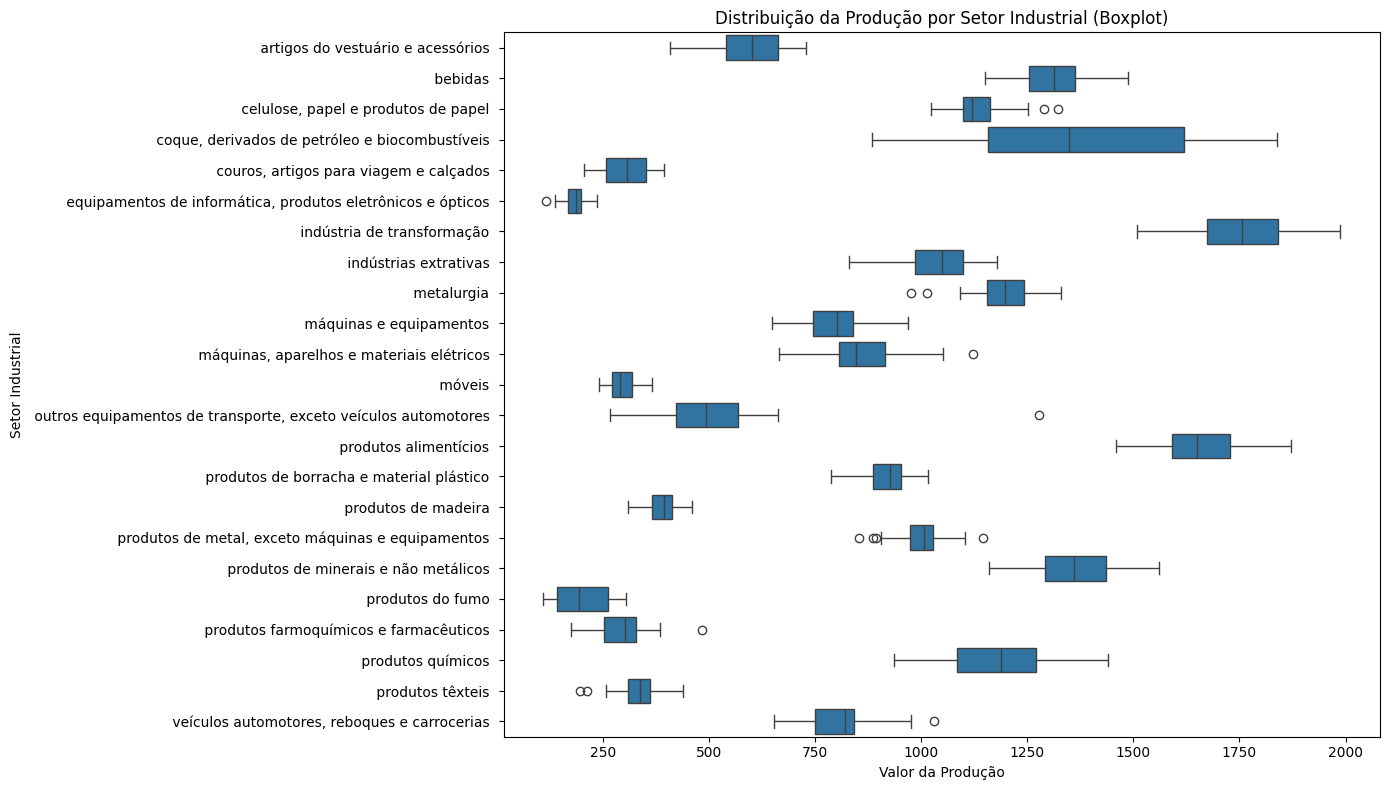

In [117]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Derrete o DataFrame para o formato long
dados_long = dados_producao_modificado.reset_index().melt(id_vars='DATE', var_name='Setor', value_name='VALOR')

# Cria o boxplot
plt.figure(figsize=(14, 8))
sns.boxplot(data=dados_long, x='VALOR', y='Setor', orient='h')

plt.title('Distribuição da Produção por Setor Industrial (Boxplot)')
plt.xlabel('Valor da Produção')
plt.ylabel('Setor Industrial')
plt.tight_layout()
plt.show()

Apesar de serem dados que progridem no tempo (afetando o uso do boxplot), percebe-se que itens com maior intervalo interquartil podem mostrar eventual evolução rápida. 

Além disso, alguns casos de outliers são detectados, mas optou-se por não excluir. O motivo é simples: pode haver algum sentido. 

In [118]:
from sklearn.preprocessing import MinMaxScaler
import plotly.graph_objects as go
import pandas as pd

# Normalizar os dados (Min-Max)
scaler = MinMaxScaler()
dados_normalizados = pd.DataFrame(
    scaler.fit_transform(dados_producao_modificado),
    columns=dados_producao_modificado.columns,
    index=dados_producao_modificado.index
)

# Calcular acumulado ao longo do tempo
dados_acumulados = dados_normalizados.cumsum()

# Criar figura Plotly
fig = go.Figure()

for coluna in dados_acumulados.columns:
    fig.add_trace(go.Scatter(
        x=dados_acumulados.index,
        y=dados_acumulados[coluna],
        mode='lines',
        name=coluna
    ))

fig.update_layout(
    title='Evolução Acumulada (Normalizada) da Produção por Setor Industrial (2022–2025)',
    xaxis_title='Data',
    yaxis_title='Produção Acumulada Normalizada',
    legend_title='Setor',
    template='plotly_white',
    hovermode='x unified',
    height=600
)

fig.show()



Ainda que normalizado, todos os setores tiveram um crescimento, ainda que algunsfossem bem menores que outros.

Isso pode se dar em virtude da própria inflação ou do desenvolvimento do país.

In [119]:
import plotly.express as px
import pandas as pd

# Calcula a matriz de correlação
correlacao = dados_producao_modificado.corr(method='pearson')

# Cria o heatmap com Plotly
fig = px.imshow(
    correlacao,
    text_auto='.2f',
    color_continuous_scale='RdBu_r',
    title='Mapa de Calor das Correlações entre Setores Industriais',
    labels=dict(color='Correlação'),
    aspect='auto'
)

fig.update_layout(
    xaxis_title='Setores Industriais',
    yaxis_title='Setores Industriais',
    template='plotly_white',
    height=800
)

fig.show()


Acima, percebem-se interessantes correlações lineares, o que pode gerar hipóteses para uma futura solução analítica. Por ora, contudo, não há grande utilidade.

##### dados_energia_corrigido

In [120]:
dados_energia_corrigido.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DATE         87 non-null     datetime64[ns]
 1   NOME_ESTADO  87 non-null     object        
 2   NAME         87 non-null     object        
 3   VALOR        87 non-null     float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 2.8+ KB


Aparentemente nenhum valor nulo. Mas e por Estado?

In [121]:
for uf in dados_energia_corrigido.NOME_ESTADO.unique():
    temp = dados_energia_corrigido[dados_energia_corrigido['NOME_ESTADO']==uf]
    texto = f"""
==============================================
Estado:                     {uf}
Data Início:                {temp.DATE.min()}
Data Fim:                   {temp.DATE.max()}
Quantidade de Dados:        {temp.shape[0]}
Descrição Valorres: 

{temp.VALOR.describe()}
==============================================
"""
    print(texto)


Estado:                     Roraima
Data Início:                2022-01-01 00:00:00
Data Fim:                   2024-01-01 00:00:00
Quantidade de Dados:        3
Descrição Valorres: 

count        3.000000
mean     29645.189667
std       4508.380762
min      24667.000000
25%      27741.340000
50%      30815.680000
75%      32134.284500
max      33452.889000
Name: VALOR, dtype: float64


Estado:                     Acre
Data Início:                2022-01-01 00:00:00
Data Fim:                   2024-01-01 00:00:00
Quantidade de Dados:        3
Descrição Valorres: 

count        3.000000
mean     49065.835333
std       2798.282426
min      47034.200000
25%      47469.955000
50%      47905.710000
75%      50081.653000
max      52257.596000
Name: VALOR, dtype: float64


Estado:                     Amapá
Data Início:                2022-01-01 00:00:00
Data Fim:                   2024-01-01 00:00:00
Quantidade de Dados:        3
Descrição Valorres: 

count         3.000000
mean      65055.4

Acima, percebe-se que o dataset possui dados regionais também, mas que são desnecessários.

Ainda, verifica-se que os dados são anuais, o que pode gerar uma futura inconsistência com os dados de produção.

In [122]:
# Excluindo dados regionais

dados_regionais = ['Brasil', 'Região Sudeste', 'Região Sul', 'Região Norte', 'Região Nordeste', 'Região Centro-oeste']
dados_energia_corrigido = dados_energia_corrigido[~dados_energia_corrigido['NOME_ESTADO'].isin(dados_regionais)]
dados_energia_corrigido.NOME_ESTADO.unique()

array(['Roraima', 'Acre', 'Amapá', 'Piauí', 'Tocantins', 'Rondônia',
       'Distrito Federal', 'Sergipe', 'Rio Grande do Norte', 'Paraíba',
       'Alagoas', 'Mato Grosso do Sul', 'Amazonas', 'Mato Grosso',
       'Ceará', 'Maranhão', 'Pernambuco', 'Espírito Santo', 'Goiás',
       'Rio de Janeiro', 'Bahia', 'Rio Grande do Sul', 'Santa Catarina',
       'Pará', 'Paraná', 'Minas Gerais', 'São Paulo'], dtype=object)

In [123]:
dados_energia_corrigido.VALOR.describe()

count    8.100000e+01
mean     7.025643e+06
std      1.129471e+07
min      2.466700e+04
25%      6.191557e+05
50%      2.459426e+06
75%      9.550180e+06
max      5.283992e+07
Name: VALOR, dtype: float64

Agora possuem 27 UF, todas com 3 valores (2022, 2023 e 2024). Aparentemente são adequados.

In [124]:
import plotly.express as px

fig = px.scatter(
    dados_energia_corrigido,
    x='NOME_ESTADO',
    y='VALOR',
    color='DATE',  # Opcional: cores diferentes por data
    title='Consumo de Energia Elétrica por Estado',
    labels={'VALOR': 'Consumo (MWh)', 'NOME_ESTADO': 'Estado'}
)

fig.update_layout(
    xaxis_tickangle=-45,
    template='plotly_white',
    height=600
)

fig.show()


MG e SP disparam no consumo, fazendo com que outras UF fiquem ocultas. Normalizando para uma melhor visualização da evolução:

In [125]:
import pandas as pd
import plotly.express as px

# Copiar o DataFrame
dados_normalizados = dados_energia_corrigido.copy()

# Ordenar por data para garantir que a primeira data venha primeiro
dados_normalizados = dados_normalizados.sort_values(['NOME_ESTADO', 'DATE'])

# Obter o valor da primeira data por estado
valores_iniciais = dados_normalizados.groupby('NOME_ESTADO')['VALOR'].transform('first')

# Normalizar com base no valor da primeira data
dados_normalizados['VALOR_NORMALIZADO'] = dados_normalizados['VALOR'] / valores_iniciais

# Criar scatter plot com Plotly
fig = px.scatter(
    dados_normalizados,
    x='NOME_ESTADO',
    y='VALOR_NORMALIZADO',
    color='DATE',
    title='Consumo de Energia Elétrica Normalizado pela Primeira Data (por Estado)',
    labels={'VALOR_NORMALIZADO': 'Consumo Relativo ao Início', 'NOME_ESTADO': 'Estado'}
)

fig.update_layout(
    xaxis_tickangle=-45,
    template='plotly_white',
    height=600
)

fig.show()



Aqui percebe-se que:

1. Amapá e Paraíba obtiveram REDUÇÃO DE CONSUMO DE ENERGIA
2. Maranhão figura como um outlier, com uma evolução elevadíssima de consumo de energia.
3. Roraima, Espírito Santo, Amazonas e Mato Grosso do Sul possuem uma elevada evolução
4. São Paulo, Rio de Janeiro, Rio Grande do Sul e outras UF já desenvolvidas, como era esperado, não tiveram um aumento expressivo. 


Isso pode indicar que os Estados menores começaram a se industrializar. 

##### dados_consumo_corrigido

In [126]:
dados_consumo_corrigido.head()

,DATE,NOME_ESTADO,NAME,VALOR
0,2022-01-01,Brasil,Condições atuais do empresário do comércio,100.083487
1,2022-02-01,Brasil,Condições atuais do empresário do comércio,100.442384
2,2022-03-01,Brasil,Condições atuais do empresário do comércio,98.267597
3,2022-04-01,Brasil,Condições atuais do empresário do comércio,98.026514
4,2022-05-01,Brasil,Condições atuais do empresário do comércio,102.191804


In [127]:
for indicador in dados_consumo_corrigido['NAME'].unique():
    temp = dados_consumo_corrigido[dados_consumo_corrigido['NAME']==indicador]
    texto = f""" 
======================
Indicador:      {indicador}
Data Inicial:   {temp.DATE.min()}
Data Final:     {temp.DATE.max()}

Descrição dos dados:
{temp.VALOR.describe()}

Informações:
"""
    print(texto)
    temp.info()
    print('======================')

 
Indicador:      Condições atuais do empresário do comércio
Data Inicial:   2022-01-01 00:00:00
Data Final:     2025-02-01 00:00:00

Descrição dos dados:
count     38.000000
mean      92.529981
std       11.204665
min       79.062462
25%       83.501668
50%       87.843201
75%      101.754449
max      115.741242
Name: VALOR, dtype: float64

Informações:

<class 'pandas.core.frame.DataFrame'>
Index: 38 entries, 0 to 37
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DATE         38 non-null     datetime64[ns]
 1   NOME_ESTADO  38 non-null     object        
 2   NAME         38 non-null     object        
 3   VALOR        38 non-null     float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 1.5+ KB
 
Indicador:      Índice de confiança do empresário do comércio
Data Inicial:   2022-01-01 00:00:00
Data Final:     2025-02-01 00:00:00

Descrição dos dados:
count     38.000000
me

Todos os indicadores possuem 38 dados, então aparentemente não há falta de nenhum. Lembrar que NOME_ESTADO é "Brasil", pois se trata de indicadores nacionais. 

Além disso, conforme o estudo de cada um deles, o valor deve variar entre 0 a 200, o que aparentemente tem sido seguido. 

Mas, como há dois indicadores para cada (empresairal e consumidor), será que há alguma correlação?

In [128]:
dados_consumo_corrigido

,DATE,NOME_ESTADO,NAME,VALOR
0,2022-01-01,Brasil,Condições atuais do empresário do comércio,100.083487
1,2022-02-01,Brasil,Condições atuais do empresário do comércio,100.442384
2,2022-03-01,Brasil,Condições atuais do empresário do comércio,98.267597
3,2022-04-01,Brasil,Condições atuais do empresário do comércio,98.026514
4,2022-05-01,Brasil,Condições atuais do empresário do comércio,102.191804
...,...,...,...,...
147,2024-10-01,Brasil,Índice de confiança do consumidor (ICC),120.970000
148,2024-11-01,Brasil,Índice de confiança do consumidor (ICC),123.930000
149,2024-12-01,Brasil,Índice de confiança do consumidor (ICC),125.620000
150,2025-01-01,Brasil,Índice de confiança do consumidor (ICC),123.510000


In [129]:
import pandas as pd
import plotly.express as px

# Pivotar o dataframe: linhas = DATE, colunas = NAME, valores = VALOR
pivot_df = dados_consumo_corrigido.pivot(index='DATE', columns='NAME', values='VALOR')

# Calcular a matriz de correlação
correlacao = pivot_df.corr(method='pearson')

# Criar heatmap com Plotly
fig = px.imshow(
    correlacao,
    text_auto='.2f',
    color_continuous_scale='RdBu_r',
    title='Heatmap de Correlação entre Indicadores de Consumo e Comércio',
    labels={'color': 'Correlação'},
    aspect='auto'
)

fig.update_layout(
    xaxis_title='Indicadores',
    yaxis_title='Indicadores',
    template='plotly_white',
    height=600
)

fig.show()


Como esperado, há altíssima correlação entre:

- Índice de confiança do empresário do comércio x Condições atuais do empresário do Comércio

- Índice de confiança do consumidor x Intenção de consumo das famílias - total


Logo, apenas dois desses indicadores poderão ser mantidos. Em virtude do:

- Índice de confiança do consumidor (ICC) ter menor correlação com os indicadores empresariais
- Condições atuais do empresário do comércio ter menor correlação com os indicadores de consumo

Eles serão os indicadores mantidos.

In [130]:
dados_consumo_corrigido = dados_consumo_corrigido[dados_consumo_corrigido['NAME'].isin(['Condições atuais do empresário do comércio', 'Índice de confiança do consumidor (ICC)'])]

In [137]:
import plotly.express as px

fig = px.histogram(
    dados_consumo_corrigido,
    x="VALOR",
    facet_col="NAME",
    facet_col_wrap=2,  # Controla quantas colunas por linha
    title="Distribuição dos Indicadores de Consumo e Comércio",
    labels={"VALOR": "Valor do Indicador"},
    nbins=60,  # Número de barras
    color="NAME"
)

fig.update_layout(
    template="plotly_white",
    height=800,
    showlegend=False
)

fig.show()


Não se percebeu qualquer tipo de distribuição específica desses valores.

In [138]:
import plotly.express as px

fig = px.box(
    dados_consumo_corrigido,
    x="NAME",
    y="VALOR",
    title="Boxplot dos Indicadores de Consumo e Comércio",
    labels={"NAME": "Indicador", "VALOR": "Valor do Indicador"},
    points="all"  # Mostra todos os pontos (outliers e dados brutos)
)

fig.update_layout(
    template="plotly_white",
    xaxis_tickangle=-45,
    height=600
)

fig.show()


Não se percebeu qualquer outlier, mas tão somente uma predominância de péssima avaliação de condições atuais do empresário e um excesso de confiança do consumidor.

## Preparação dos Dados 

## Modelagem dos Dados

## Avaliação